In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
file=pd.read_csv('diabetes.csv')

In [4]:
file.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df=pd.DataFrame(file)

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.shape

(768, 9)

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

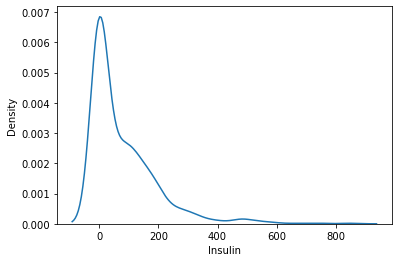

In [15]:
sns.kdeplot(df['Insulin'])

In [16]:
df['Insulin']=np.log(df['Insulin'])

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

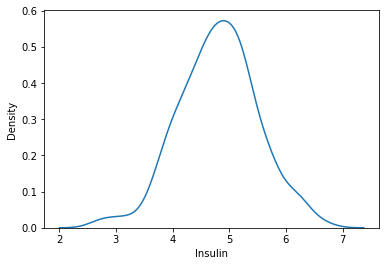

In [17]:
sns.kdeplot(df['Insulin'])

<AxesSubplot:>

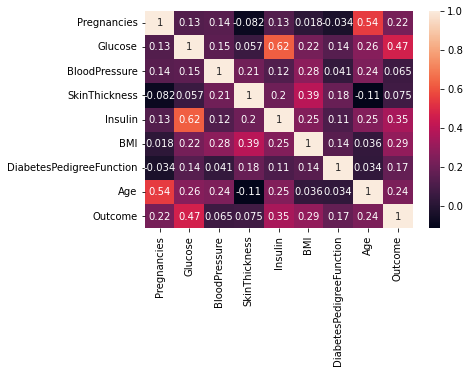

In [21]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

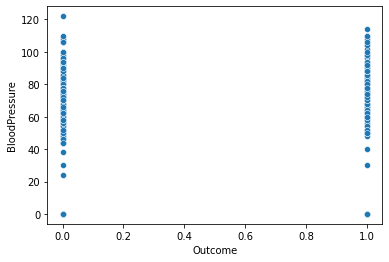

In [22]:
sns.scatterplot(df['Outcome'], df['BloodPressure'])

In [23]:
df.drop('BloodPressure', axis=1, inplace=True)

In [24]:
df

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,35,-inf,33.6,0.627,50,1
1,1,85,29,-inf,26.6,0.351,31,0
2,8,183,0,-inf,23.3,0.672,32,1
3,1,89,23,4.543295,28.1,0.167,21,0
4,0,137,35,5.123964,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,48,5.192957,32.9,0.171,63,0
764,2,122,27,-inf,36.8,0.340,27,0
765,5,121,23,4.718499,26.2,0.245,30,0
766,1,126,0,-inf,30.1,0.349,47,1


Pregnancies                     AxesSubplot(0.125,0.71587;0.352273x0.16413)
Glucose                      AxesSubplot(0.547727,0.71587;0.352273x0.16413)
SkinThickness                  AxesSubplot(0.125,0.518913;0.352273x0.16413)
Insulin                     AxesSubplot(0.547727,0.518913;0.352273x0.16413)
BMI                            AxesSubplot(0.125,0.321957;0.352273x0.16413)
DiabetesPedigreeFunction    AxesSubplot(0.547727,0.321957;0.352273x0.16413)
Age                               AxesSubplot(0.125,0.125;0.352273x0.16413)
Outcome                        AxesSubplot(0.547727,0.125;0.352273x0.16413)
dtype: object

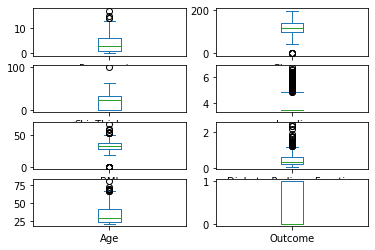

In [25]:
df.plot(kind='box', subplots=True, layout=(4,2) )

In [26]:
from scipy.stats import zscore

In [28]:
z=np.abs(zscore(df))

In [29]:
z

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.907270,NaN,0.204013,0.468492,1.425995,1.365896
1,0.844885,1.123396,0.530902,NaN,0.684422,0.365061,0.190672,0.732120
2,1.233880,1.943724,1.288212,NaN,1.103255,0.604397,0.105584,1.365896
3,0.844885,0.998208,0.154533,NaN,0.494043,0.920763,1.041549,0.732120
4,1.141852,0.504055,0.907270,NaN,1.409746,5.484909,0.020496,1.365896
...,...,...,...,...,...,...,...,...
763,1.827813,0.622642,1.722735,NaN,0.115169,0.908682,2.532136,0.732120
764,0.547919,0.034598,0.405445,NaN,0.610154,0.398282,0.531023,0.732120
765,0.342981,0.003301,0.154533,NaN,0.735190,0.685193,0.275760,0.732120
766,0.844885,0.159787,1.288212,NaN,0.240205,0.371101,1.170732,1.365896


In [30]:
z.drop('Insulin', axis=1)

,Pregnancies,Glucose,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.907270,0.204013,0.468492,1.425995,1.365896
1,0.844885,1.123396,0.530902,0.684422,0.365061,0.190672,0.732120
2,1.233880,1.943724,1.288212,1.103255,0.604397,0.105584,1.365896
3,0.844885,0.998208,0.154533,0.494043,0.920763,1.041549,0.732120
4,1.141852,0.504055,0.907270,1.409746,5.484909,0.020496,1.365896
...,...,...,...,...,...,...,...
763,1.827813,0.622642,1.722735,0.115169,0.908682,2.532136,0.732120
764,0.547919,0.034598,0.405445,0.610154,0.398282,0.531023,0.732120
765,0.342981,0.003301,0.154533,0.735190,0.685193,0.275760,0.732120
766,0.844885,0.159787,1.288212,0.240205,0.371101,1.170732,1.365896


In [31]:
newdf=df[(z<3).all(axis=1)]

In [32]:
newdf

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [40]:
x=df.iloc[:,0:-1]

In [42]:
x

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,35,-inf,33.6,0.627,50
1,1,85,29,-inf,26.6,0.351,31
2,8,183,0,-inf,23.3,0.672,32
3,1,89,23,4.543295,28.1,0.167,21
4,0,137,35,5.123964,43.1,2.288,33
...,...,...,...,...,...,...,...
763,10,101,48,5.192957,32.9,0.171,63
764,2,122,27,-inf,36.8,0.340,27
765,5,121,23,4.718499,26.2,0.245,30
766,1,126,0,-inf,30.1,0.349,47


In [43]:
y=df.iloc[:,-1]

In [44]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [45]:
y.shape

(768,)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [47]:
x_train

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,0,-inf,24.0,1.022,34
223,7,142,33,5.247024,28.8,0.687,61
393,4,116,12,4.465908,22.1,0.463,37
766,1,126,0,-inf,30.1,0.349,47
570,3,78,0,-inf,32.5,0.270,39
...,...,...,...,...,...,...,...
71,5,139,35,4.941642,28.6,0.411,26
106,1,96,0,-inf,22.4,0.207,27
270,10,101,37,-inf,45.6,1.136,38
435,0,141,0,-inf,42.4,0.205,29


In [48]:
x_train.shape

(514, 7)

In [49]:
x_test.shape

(254, 7)